<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل ماندگاری مشتری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       معمولاً جذب مشتری جدید برای یک شرکت امر دشوار و هزینه‌بری است زیرا که برای این کار تیم بازاریابی نیاز به استفاده از روش‌های مختلف تبلیغات و ارتباط با مشتریان دارد.
       بنابراین سعی می‌شود تا حد ممکن به حفظ مشتریان فعلی و افزایش ماندگاری آن‌ها توجه شود.
       برای تسهیل چنین کاری در گام آخر از پروژه باید نموداری رسم کنید که نمایانگر ماندگاری مشتریان شرکت باشد و به کمک تیم بازاریابی بیاید.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام اول پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv("preprocessed_sales.csv", parse_dates=["InvoiceDate"])
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    نمودار ماندگاری
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این گام از پروژه باید نموداری همچون شکل زیر رسم کنید که محور عمودی آن، نشان‌‌دهنده‌ی ماهی است که یک مشتری برای اولین‌بار با شرکت معامله داشته و محور افقی، نشان‌ می‌دهد که چند درصد مشتریان جدید در ماه‌های بعد از اولین معامله، مشتری شرکت می‌مانند و با شرکت حداقل یک فاکتور در ماه دارند.
    <br>
    به‌عنوان مثال در ماه اول (<code dir=ltr>2009-12-01</code>) از شکل زیر مشاهده می‌کنید از بین افرادی که برای نخستین بار خریدشان را در ماه <code>12</code> از سال <code>2009</code> انجام داده‌اند، ۳۵ درصد در ماه بعد هم حداقل یک معامله داشته‌اند و ۳۳ درصد نیز دو ماه بعد حداقل یک فاکتور ثبت کرده‌اند.
</font>
</p>

<div style="text-align:center;"><img src="retention_rate_b.jpg"></div>

<h3 align=right dir=rtl style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نقشه‌ی حرارتی (Heatmap)</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    نقشه‌ی حرارتی را پیش از این هم در تمرین‌های قبلی کالج دیده و ترسیم کرده‌اید. با این حال، در اینجا از یک سری پارامتر دیگر آن هم استفاده خواهیم کرد.
    <br>
پارامتر <code>annot</code> مخفف کلمه‌ی <i>annotation</i> به معنی حاشیه‌نویسی است. با <code>True</code> کردن این پارامتر، مقدار خانه‌ها روی آن‌ها نمایش داده می‌شود.
<br>
همچنین پارامترهای <code>vmin</code> و <code>vmax</code>، محدوده‌ی اعدادی که تابع نگاشت رنگ روی آن‌ها نگاشت انجام می‌دهد را تعیین می‌کند. در حالت پیش‌فرض، این بازه طبق داده‌های ورودی تنظیم می‌شود اما با تنظیم مقادیر مشخص برای آن‌ها، اعدادی که خارج از بازه‌ی مشخص‌شده قرار می‌گیرند،‌ رنگی معادل
 اعداد انتهای بازه خواهند داشت.
 <br>
 

</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرمت رشته</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
موضوع دیگری که در این سوال با آن مواجه می‌شوید، فرمت رشته‌ی نمایشی بر روی خانه‌های نقشه حرارتی می‌باشد.
<br>
با پارامتر <code>fmt</code> در متد <code>heatmap</code> می‌توان فرمت نمایش اعداد را مشخص کرد. این کار با استفاده از کد فرمت رشته مشخص می‌شود. کد <code>f</code> مشخص می‌کند که اعداد تا چند رقم اعشار نمایش داده شوند. برای آشنایی با دیگر کدهای فرمت رشته، 
<a href="url">این لینک</a>
ببینید.
 

</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>ویژگی‌های نمودار</b>
</font>
</h3>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۸ اینچ |
| بازه اعداد برای تابع نگاشت رنگ | ۰ تا ۵۰ |
| کد فرمت مورد استفاده | <code dir=ltr>.0f</code> |
| تابع نگاشت رنگ (<code>cmap</code>) | <code>BuGn</code> |

</font>
</div>
</center>


In [3]:
# Create a new column "InvoiceMonth" with a datetime object representing the first day of the month of each transaction
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))

# Create a new column "CohortMonth" with a datetime object representing the first month that a customer made a purchase
df['CohortMonth'] = df.groupby('CustomerId')['InvoiceMonth'].transform('min')

df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01


In [4]:
# Define a function to extract the year and month from a datetime column in a Pandas DataFrame
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Extract the year and month from the "InvoiceMonth" and "CohortMonth" columns using the get_date_int function
invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month  = get_date_int(df, 'CohortMonth')

# Calculate the difference in years and months between the "InvoiceMonth" and "CohortMonth" columns
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the "CohortIndex" column by converting the difference in years and months to months, and adding one
df['CohortIndex'] = years_diff * 12 + months_diff + 1

# Select only the "CohortMonth" and "CohortIndex" columns of the DataFrame
df[['CohortMonth', 'CohortIndex']]

,CohortMonth,CohortIndex
0,2009-12-01,1
1,2009-12-01,1
2,2009-12-01,1
3,2009-12-01,1
4,2009-12-01,1
...,...,...
400911,2009-12-01,13
400912,2009-12-01,13
400913,2009-12-01,13
400914,2009-12-01,13


In [5]:
# Group the DataFrame by "CohortMonth" and "CohortIndex"
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customer IDs in each (cohort month, cohort index) group
cohort_data = grouping['CustomerId'].apply(pd.Series.nunique)

# Reset the index of the DataFrame to create a flat table with columns for cohort month, cohort index, and customer count
cohort_data = cohort_data.reset_index()

# Reshape the DataFrame so that the columns represent the "CohortIndex" values,
# the rows represent the "CohortMonth" values, and the cell values represent the count of unique customer IDs
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerId')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Select the first column of the "cohort_counts" DataFrame, which represents the count of customers in each cohort group
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the entire "cohort_counts" DataFrame by the "cohort_sizes" series, row-wise, to create a matrix of customer retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Multiply the entire "retention" DataFrame by 100 and round to two decimal places to create human-readable percentages
retention = retention.round(2) * 100

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,42.0,50.0,25.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,30.0,10.0,NaN
2010-02-01,100.0,24.0,22.0,29.0,25.0,20.0,19.0,29.0,25.0,28.0,7.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,20.0,25.0,30.0,28.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,7.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,8.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.0,19.0,20.0,23.0,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,30.0,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Retention rates')

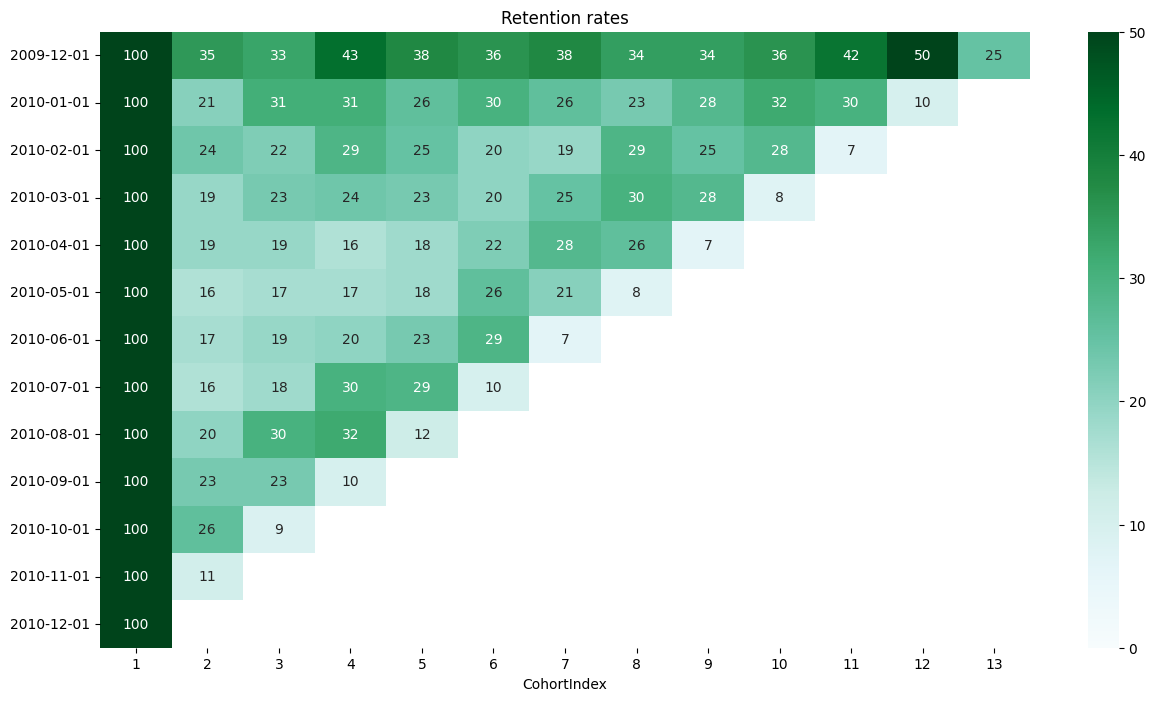

In [7]:
# Convert the index of the "retention" DataFrame to a date-based index for better labeling on the heatmap
retention.index = retention.index.date

fig, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap using Seaborn's `sns.heatmap` function
ax = sns.heatmap(data = retention, annot = True,
                 fmt=".0f",
                 vmin = 0,
                 vmax = 50,
                 cmap = 'BuGn'
                    )
ax.set_title("Retention rates")

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [8]:
import zipfile
import joblib

joblib.dump(fig, "fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig", "final_project_5_retention_rate.ipynb"]
compress(file_names)

File Paths:
['fig', 'final_project_5_retention_rate.ipynb']
